In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_la=pd.read_csv("loanapproval.csv")

In [3]:
df_la.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:
df_la.shape

(4269, 13)

In [5]:
df_la.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [6]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
print(df_la.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [8]:
df_la.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df_la.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
df_la[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [11]:
df_la[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

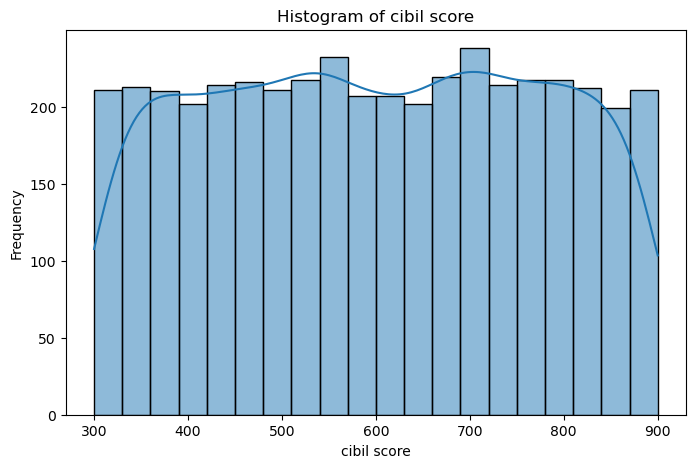

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df_la[' cibil_score'], bins=20, kde=True)
plt.title('Histogram of cibil score')
plt.xlabel('cibil score')
plt.ylabel('Frequency')
plt.show()

In [13]:
#OBSERVATIONS:
#This Chart tells us that Cibil Score has Equal range of values 

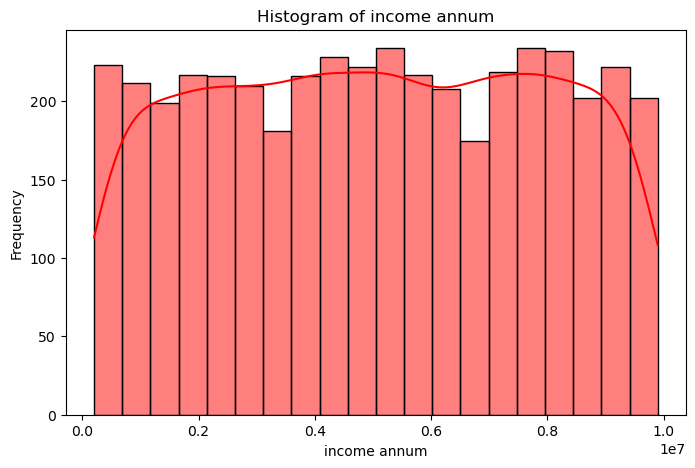

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df_la[' income_annum'], bins=20, kde=True,color='red' )
plt.title('Histogram of income annum')
plt.xlabel('income annum')
plt.ylabel('Frequency')
plt.show()

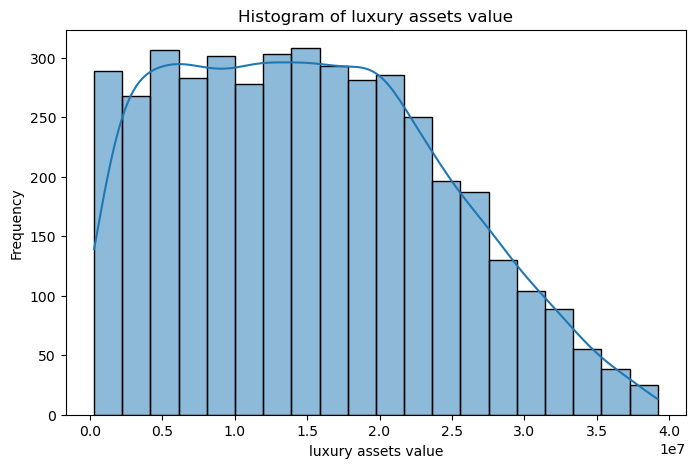

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_la[' luxury_assets_value'], bins=20, kde=True)
plt.title('Histogram of luxury assets value')
plt.xlabel('luxury assets value')
plt.ylabel('Frequency')
plt.show()

In [16]:
#OBSERVATION:
#The Chart implies that there are no outliers in luxury asset value.

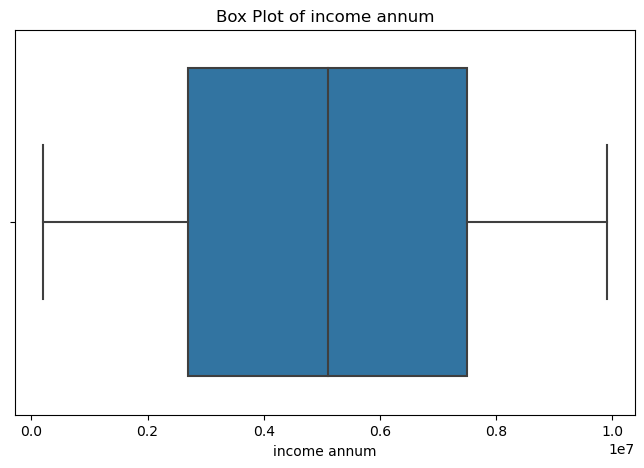

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' income_annum'])
plt.title('Box Plot of income annum')
plt.xlabel('income annum')
plt.show()


In [18]:
#OBSERVATION:
#This chart clearly tells us it is free from outliers.

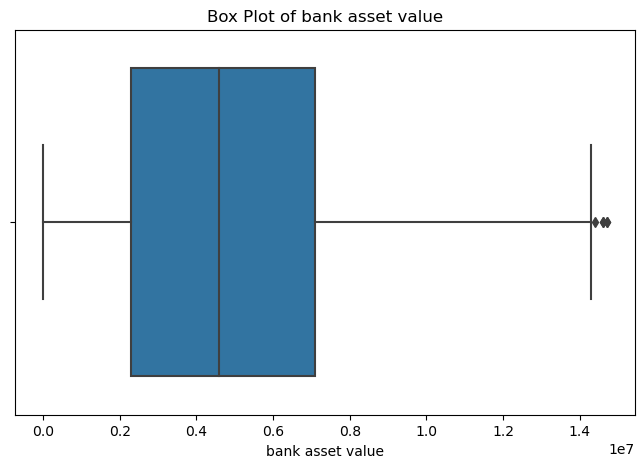

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' bank_asset_value'])
plt.title('Box Plot of bank asset value')
plt.xlabel('bank asset value')
plt.show()

In [20]:
#OBSERVATION:
#This chart clearly explains us the presence of outliers in the upper bound region but less in number.

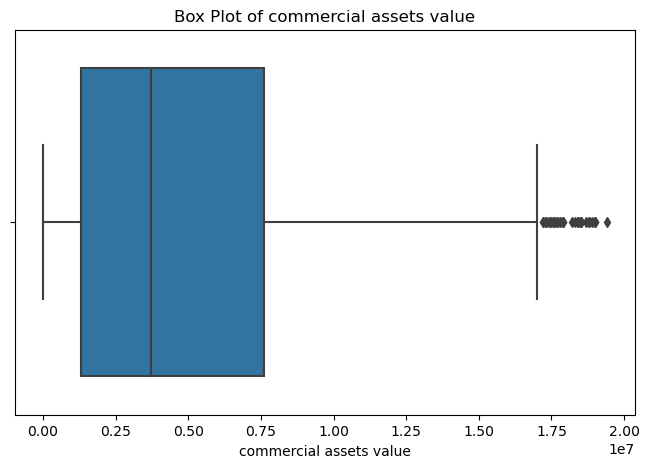

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' commercial_assets_value'])
plt.title('Box Plot of commercial assets value')
plt.xlabel('commercial assets value')
plt.show()

In [22]:
#OBSERVATION
#from this we can infer that there are more number of outliers but present in a nearby range

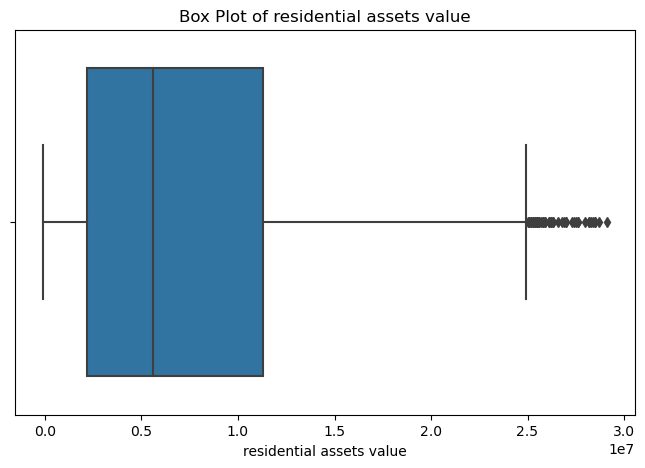

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' residential_assets_value'])
plt.title('Box Plot of residential assets value')
plt.xlabel('residential assets value')
plt.show()

In [24]:
#OBSERVATION:
#This depicts us the presence of outliers.

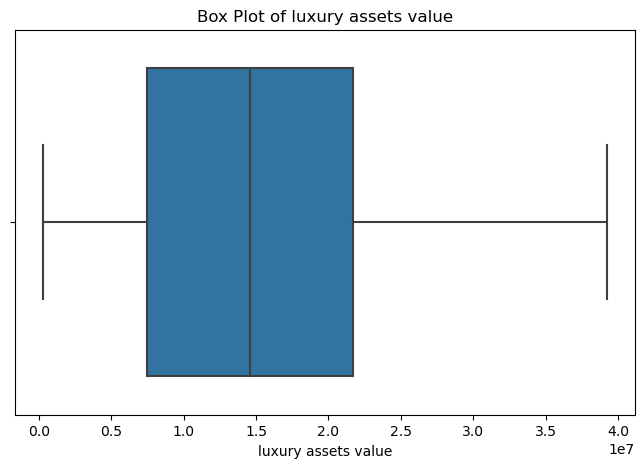

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' luxury_assets_value'])
plt.title('Box Plot of luxury assets value')
plt.xlabel('luxury assets value')
plt.show()

In [26]:
#OBSERVATION:
#This tells us the column is free from outliers and has a good range of values.

#  Data preprocessing

In [ ]:
df_la = df_la.drop(columns=['loan_id'])

In [33]:
df_la

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [30]:
df_la=df_la.dropna()

In [31]:
df_la.shape

(4269, 12)

In [34]:
df_num = df_la.select_dtypes(include='number')

In [35]:
df_num.head(3)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000


### Removal Of Outliers

In [59]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [60]:
lower_bound

 no_of_dependents                  -3.5
 income_annum                -4500000.0
 loan_amount                -13000000.0
 loan_term                         -9.0
 cibil_score                       10.5
 residential_assets_value   -11450000.0
 commercial_assets_value     -8150000.0
 luxury_assets_value        -13800000.0
 bank_asset_value            -4900000.0
dtype: float64

In [61]:
upper_bound

 no_of_dependents                   8.5
 income_annum                14700000.0
 loan_amount                 42200000.0
 loan_term                         31.0
 cibil_score                     1190.5
 residential_assets_value    24950000.0
 commercial_assets_value     17050000.0
 luxury_assets_value         43000000.0
 bank_asset_value            14300000.0
dtype: float64

In [ ]:
df_la = df_la[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [63]:
df_la.shape

(4178, 12)

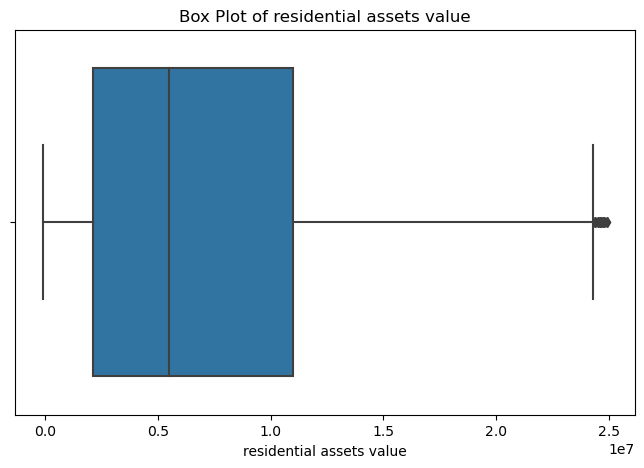

In [57]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' residential_assets_value'])
plt.title('Box Plot of residential assets value')
plt.xlabel('residential assets value')
plt.show()

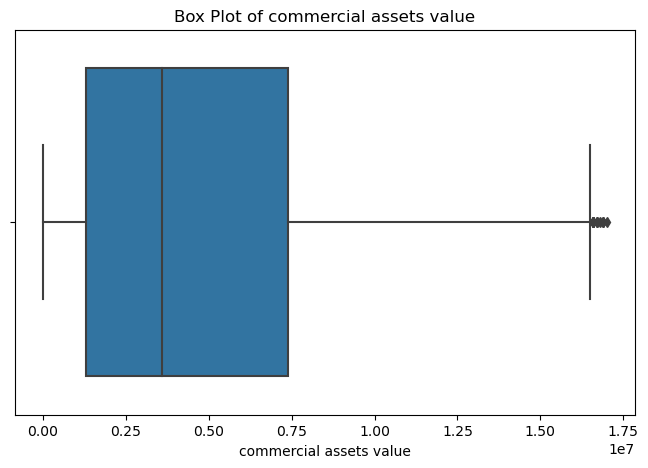

In [58]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_la[' commercial_assets_value'])
plt.title('Box Plot of commercial assets value')
plt.xlabel('commercial assets value')
plt.show()

In [64]:
X = df_la.drop(' loan_status', axis=1)
y = df_la[' loan_status']
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000


In [65]:
X_num = X.select_dtypes('number')
X_num.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000


In [66]:
X_cat = X.select_dtypes('object')
X_cat.head()

,education,self_employed
1,Not Graduate,Yes
2,Graduate,No
3,Graduate,No
4,Not Graduate,Yes
5,Graduate,Yes


In [67]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [68]:
type(X_num_scaled)

numpy.ndarray

In [69]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [70]:
X_num_scaled.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000
mean,0.499904,0.491171,0.371842,0.493724,0.500323,0.291294,0.283315,0.374507,0.340890
std,0.338998,0.284678,0.227903,0.317028,0.287165,0.245402,0.247321,0.231252,0.222559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.247423,0.183673,0.222222,0.256667,0.088000,0.076471,0.179949,0.160839
50%,0.600000,0.494845,0.357143,0.444444,0.500000,0.224000,0.211765,0.359897,0.314685
75%,0.800000,0.739691,0.530612,0.777778,0.746667,0.444000,0.435294,0.537275,0.489510
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int) 

In [72]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [73]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((4178, 13), (4178, 9), (4178, 4))

In [74]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

 no_of_dependents            0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 education_ Graduate         0
 education_ Not Graduate     0
 self_employed_ No           0
 self_employed_ Yes          0
dtype: int64
0
(4178, 13)
(4178,)


In [75]:
X.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
count,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000,4178.000000
mean,0.499904,0.491171,0.371842,0.493724,0.500323,0.291294,0.283315,0.374507,0.340890,0.504548,0.495452,0.496649,0.503351
std,0.338998,0.284678,0.227903,0.317028,0.287165,0.245402,0.247321,0.231252,0.222559,0.500039,0.500039,0.500049,0.500049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.247423,0.183673,0.222222,0.256667,0.088000,0.076471,0.179949,0.160839,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.494845,0.357143,0.444444,0.500000,0.224000,0.211765,0.359897,0.314685,1.000000,0.000000,0.000000,1.000000
75%,0.800000,0.739691,0.530612,0.777778,0.746667,0.444000,0.435294,0.537275,0.489510,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
X = X[[' cibil_score',' loan_amount',' loan_term']]


In [123]:
y

1        Rejected
2        Rejected
3        Rejected
4        Rejected
5        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4178, dtype: object

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2924, 3)
(1254, 3)
(2924,)
(1254,)


#### Decision Tree Classifier Algorithm

In [116]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

In [130]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=3)

In [131]:
model = clf.fit(X_train,y_train)

In [132]:
# feature importance
df1 = pd.DataFrame({'features':model.feature_names_in_, 'importance':model.feature_importances_})
df1.sort_values(by='importance')

,features,importance
1,loan_amount,0.012837
2,loan_term,0.077794
0,cibil_score,0.909369


In [133]:
X

,cibil_score,loan_amount,loan_term
1,0.195000,0.303571,0.333333
2,0.343333,0.750000,1.000000
3,0.278333,0.775510,0.333333
4,0.136667,0.609694,1.000000
5,0.031667,0.336735,0.444444
...,...,...,...
4264,0.028333,0.051020,0.555556
4265,0.431667,0.280612,1.000000
4266,0.261667,0.602041,0.888889
4267,0.800000,0.318878,0.333333


In [134]:
X.columns

Index([' cibil_score', ' loan_amount', ' loan_term'], dtype='object')

[Text(0.4583333333333333, 0.875, 'x[0] <= 0.416\ngini = 0.47\nsamples = 2924\nvalue = [1820, 1104]'),
 Text(0.25, 0.625, 'x[2] <= 0.167\ngini = 0.179\nsamples = 1216\nvalue = [121, 1095]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 0.659\ngini = 0.5\nsamples = 241\nvalue = [121, 120]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.489\nsamples = 206\nvalue = [88, 118]'),
 Text(0.25, 0.125, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 975\nvalue = [0, 975]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= 0.024\ngini = 0.01\nsamples = 1708\nvalue = [1699, 9]'),
 Text(0.5, 0.375, 'x[0] <= 0.973\ngini = 0.075\nsamples = 51\nvalue = [49, 2]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8333333333333334, 0.375, 'x[1] <= 0.172\ngini = 0.008\nsamples = 1657\nvalue = [1650, 7]'),
 Text(0.75, 0.125, 'gini = 0.022\nsampl

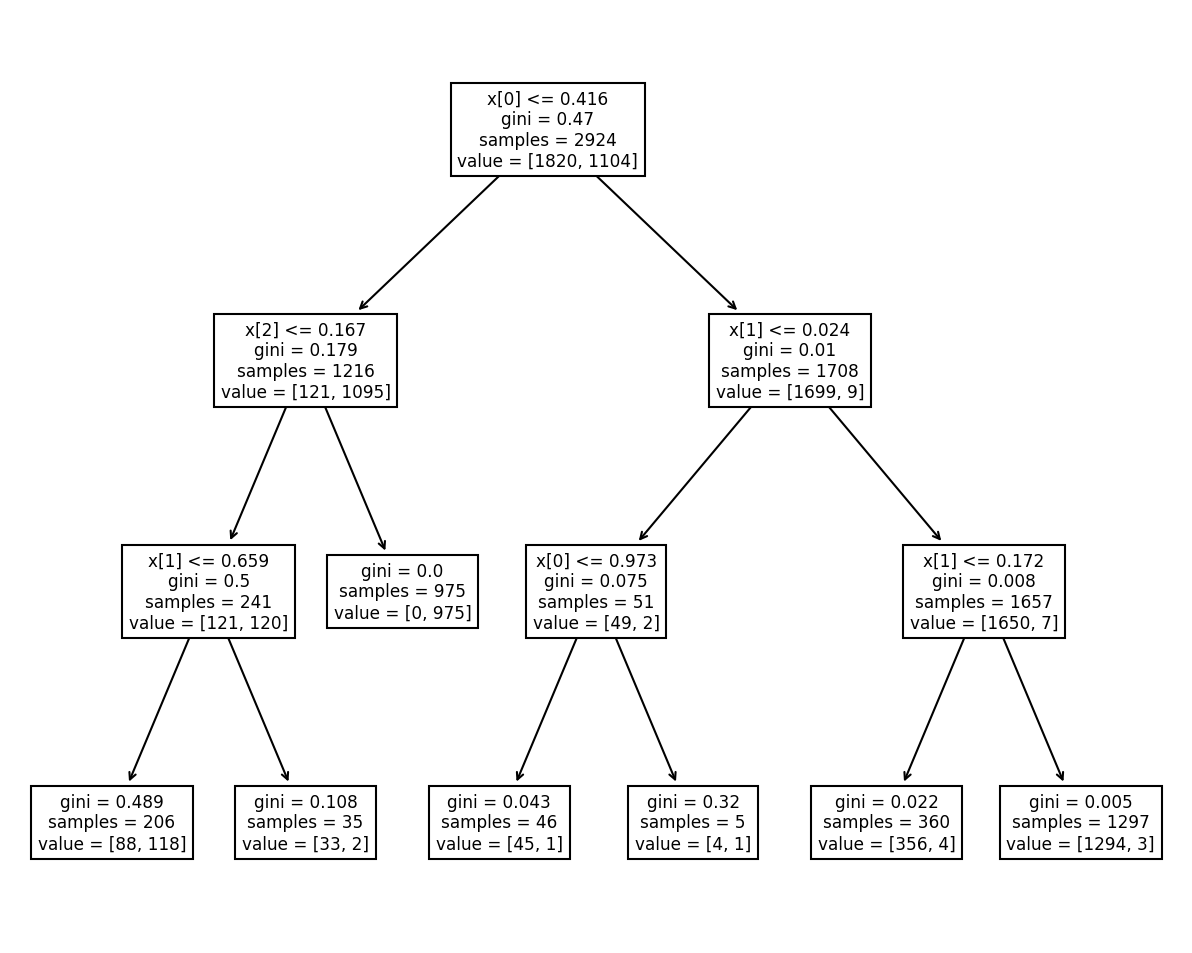

In [135]:
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model)